# **Machine Learning - Classification**

## **1. Business Understanding**

**Context:** 
A streaming service enterprise want to create a machine learning - binary classification model to predict whether customers will likely to churn or not. 

## **2. Data Understanding**

In [1]:
# Importing libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading and read the file
df = pd.read_csv('churn.csv')

In [3]:
# Quick review
display(df.head(),df.tail())

,customer_id,gender,senior_citizen,partner,dependent,tenure,contract,payment_method,monthly_charges,churn
0,7590-VHVEG,Female,0.0,NaN,No,1.0,monthly,Electronic check,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34.0,bimonthly,Mailed check,56.95,No
2,3668-QPYBK,Male,0.0,No,No,2.0,monthly,Mailed check,53.85,Yes
3,7795-CFOCW,Male,0.0,No,No,45.0,bimonthly,Bank transfer (automatic),42.30,No
4,9237-HQITU,Female,0.0,No,No,2.0,monthly,Electronic check,70.70,Yes


,customer_id,gender,senior_citizen,partner,dependent,tenure,contract,payment_method,monthly_charges,churn
7041,5067-WJEUN,NaN,0.0,Yes,Yes,67.0,quarterly,Bank transfer (automatic),54.20,No
7042,3866-MDTUB,Female,0.0,No,No,2.0,monthly,Electronic check,70.75,Yes
7043,8434-PNQZX,Female,0.0,No,No,42.0,quarterly,Credit card (automatic),78.45,No
7044,2921-XWDJH,Female,1.0,Yes,No,38.0,monthly,Electronic check,83.45,No
7045,3604-WLABM,Female,0.0,No,No,10.0,monthly,Electronic check,54.25,No


In [4]:
# Data dimension # Rows and columns
df.shape

(7046, 10)

In [5]:
# What are the columns of the dataframe
df.columns

Index(['customer_id', 'gender', 'senior_citizen', 'partner', 'dependent',
       'tenure', 'contract', 'payment_method', 'monthly_charges', 'churn'],
      dtype='object')

In [6]:
# Data summary and statistical descriptive
display(df.info(), df.describe(), df.describe(include='O'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7046 entries, 0 to 7045
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      7037 non-null   object 
 1   gender           7030 non-null   object 
 2   senior_citizen   7034 non-null   float64
 3   partner          7030 non-null   object 
 4   dependent        7027 non-null   object 
 5   tenure           7029 non-null   float64
 6   contract         7033 non-null   object 
 7   payment_method   7035 non-null   object 
 8   monthly_charges  7036 non-null   float64
 9   churn            7046 non-null   object 
dtypes: float64(3), object(7)
memory usage: 550.6+ KB


None

,senior_citizen,tenure,monthly_charges
count,7034.000000,7029.000000,7036.000000
mean,0.162354,32.582586,64.800391
std,0.368802,25.155508,30.070620
min,0.000000,1.000000,18.250000
25%,0.000000,9.000000,35.650000
50%,0.000000,29.000000,70.350000
75%,0.000000,56.000000,89.850000
max,1.000000,216.000000,118.750000


,customer_id,gender,partner,dependent,contract,payment_method,churn
count,7037,7030,7030,7027,7033,7035,7046
unique,7023,2,2,2,3,4,2
top,6000-UKLWI,Male,No,No,monthly,Electronic check,No
freq,2,3552,3638,4931,3873,2367,5174


In [7]:
# Separating column based on the data type type
numericals = df.select_dtypes(include='number').columns.tolist()
categoricals = df.select_dtypes(include='object').columns.tolist()

# Check
print('numericals columns:', numericals)
print('categoricals columns:', categoricals)

numericals columns: ['senior_citizen', 'tenure', 'monthly_charges']
categoricals columns: ['customer_id', 'gender', 'partner', 'dependent', 'contract', 'payment_method', 'churn']


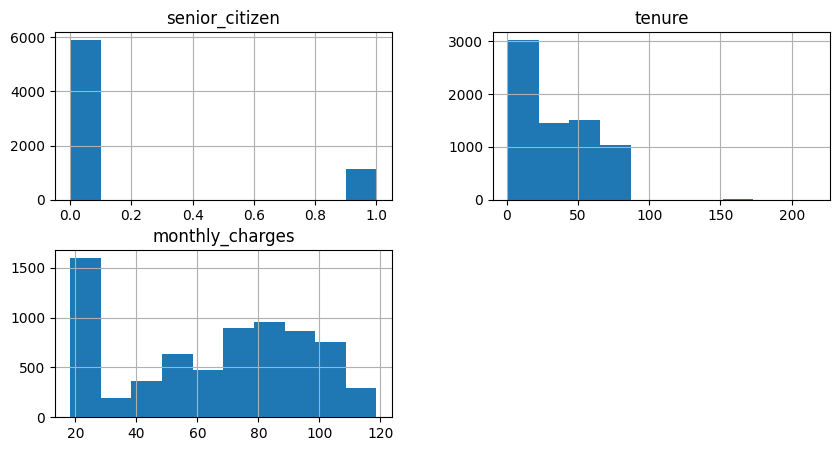

In [8]:
# quick visualization
df.hist(bins=10, figsize=(10,5))
plt.show()

## **3. Data Preparation**

In [9]:
# Check for Missing values
df.isna().sum()

customer_id         9
gender             16
senior_citizen     12
partner            16
dependent          19
tenure             17
contract           13
payment_method     11
monthly_charges    10
churn               0
dtype: int64

In [10]:
# Percentage of missing values
df.isna().sum()*100/len(df)

customer_id        0.127732
gender             0.227079
senior_citizen     0.170309
partner            0.227079
dependent          0.269657
tenure             0.241272
contract           0.184502
payment_method     0.156117
monthly_charges    0.141924
churn              0.000000
dtype: float64

In [11]:
# Check for Duplicated data
df.duplicated().sum()

14

The number of rows with missing values are relatively small in proportion. Thus, we can simply drop them. We can impute missing values if they are significant in numbers.

In [12]:
# drop missing values
df = df.dropna()
# drop duplicates
df = df.drop_duplicates()

In [13]:
# Sanity check # Missing values
df.isna().sum()

customer_id        0
gender             0
senior_citizen     0
partner            0
dependent          0
tenure             0
contract           0
payment_method     0
monthly_charges    0
churn              0
dtype: int64

In [14]:
# sanity check # duplicates
print('number of duplicates:', df.duplicated().sum())

number of duplicates: 0


In [15]:
# Drop customer id (identifier, useless)
df = df.drop(columns='customer_id')

In [16]:
# Availble data
df.shape

(6910, 9)

We have 6910 rows and 9 columns after cleaning. Previously, the data frame contained 7046 rows and 10 columns.

**Feature Engineering**

In [17]:
# copy data
data = df.copy()

In [22]:
# Mapping contract columns
ordinal_mapping = [
    {'col' : 'contract',
     'mapping' : {
        'monthly' : 0,
        'bimonthly' : 1,
        'quarterly' : 2
    }}]

In [24]:
# Encoding for categorical columns

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from category_encoders import OrdinalEncoder

# Column Transformer
transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), ['partner', 'dependent', 'gender', 'payment_method']),
    ('ordinal', OrdinalEncoder(mapping= ordinal_mapping), ['contract']),
], remainder='passthrough')

## **4. Modelling**

**Define Features and target**

In [26]:
# Features
X = data.drop(columns = 'churn')

# Target
y = data['churn']

In [27]:
# Replacing the values of target
y = y.replace({'Yes':1, 'No':0})

**Data splitting**

In [28]:
# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y) #  20% data test and 80% data train

**Decision Tree Model**

In [34]:
# Define the decision tree model 
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()

In [35]:
# Creating pipeline
from imblearn.pipeline import Pipeline

classification_pipeline_dtree = Pipeline(
    [('transformer', transformer),
     ('algo', dtree)
])

# Fitting the model throught pipeline
classification_pipeline_dtree.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['partner', 'dependent',
                                                   'gender',
                                                   'payment_method']),
                                                 ('ordinal',
                                                  OrdinalEncoder(mapping=[{'col': 'contract',
                                                                           'data_type': dtype('O'),
                                                                           'mapping': monthly      0
bimonthly    1
quarterly    2
dtype: int64}]),
                                                  ['contract'])])),
                ('algo', DecisionTreeClassifier())])

In [36]:
# Decision Tree model performance
from sklearn.metrics import accuracy_score

# performance on training data
y_train_pred = classification_pipeline_dtree.predict(X_train)
print(f'Decision Tree Accuracy on train data: {accuracy_score(y_train,y_train_pred):.4f}')

# performance on testing data
y_test_pred = classification_pipeline_dtree.predict(X_test)
print(f'Decision Tree Accuracy on test data: {accuracy_score(y_test,y_test_pred):.4f}')

Decision Tree Accuracy on train data: 0.9958
Decision Tree Accuracy on test data: 0.7156


In [30]:
# Define model Random Forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [31]:
# Creating pipeline
from imblearn.pipeline import Pipeline

classification_pipeline_rfc = Pipeline(
    [('transformer', transformer),
     ('algo', rfc)
])

# Fitting the model throught pipeline
classification_pipeline_rfc.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['partner', 'dependent',
                                                   'gender',
                                                   'payment_method']),
                                                 ('ordinal',
                                                  OrdinalEncoder(mapping=[{'col': 'contract',
                                                                           'data_type': dtype('O'),
                                                                           'mapping': monthly      0
bimonthly    1
quarterly    2
dtype: int64}]),
                                                  ['contract'])])),
                ('algo', RandomForestClassifier())])

**5. Model Evaluation**

In [32]:
# Random forest model performance
from sklearn.metrics import accuracy_score

# performance on training data
y_train_pred = classification_pipeline_rfc.predict(X_train)
print(f'Random Forest Accuracy on train data: {accuracy_score(y_train,y_train_pred):.4f}')

# performance on testing data
y_test_pred = classification_pipeline_rfc.predict(X_test)
print(f'Random Forest Accuracy on test data: {accuracy_score(y_test,y_test_pred):.4f}')

Random Forest Accuracy on train data: 0.9958
Random Forest Accuracy on test data: 0.7713


Random forest has better accuracy score on the test set than decision tree. Thus, Random forest is the best model for this experiment

**6. Saving model for model deployment**

In [38]:
# Saving model

import pickle

# Fittling model to all data
classification_pipeline_rfc.fit(X, y)

# Save model
pickle.dump(classification_pipeline_rfc, open('random_forest_churn_model.pkl', 'wb'))